In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import joblib

In [6]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)
print(sklearn.__version__)

2.1.4
1.26.4
0.12.2
1.2.2


In [8]:
# Load the dataset
df = pd.read_csv('C:/Users/vijay/OneDrive/Desktop/AI-ML-DS/ML model/DiabPredict/DiabetesModel/diabetes.csv')

In [9]:

# Display the first few rows of the dataset
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [10]:
# Check for missing values
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


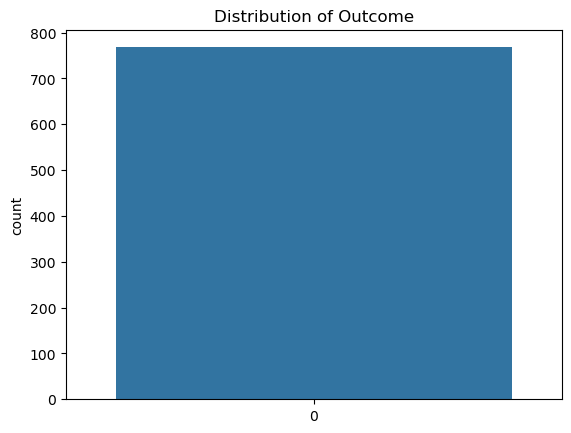

In [11]:
# Visualizing the distribution of the 'Outcome' variable
sns.countplot(df['Outcome'])
plt.title('Distribution of Outcome')
plt.show()

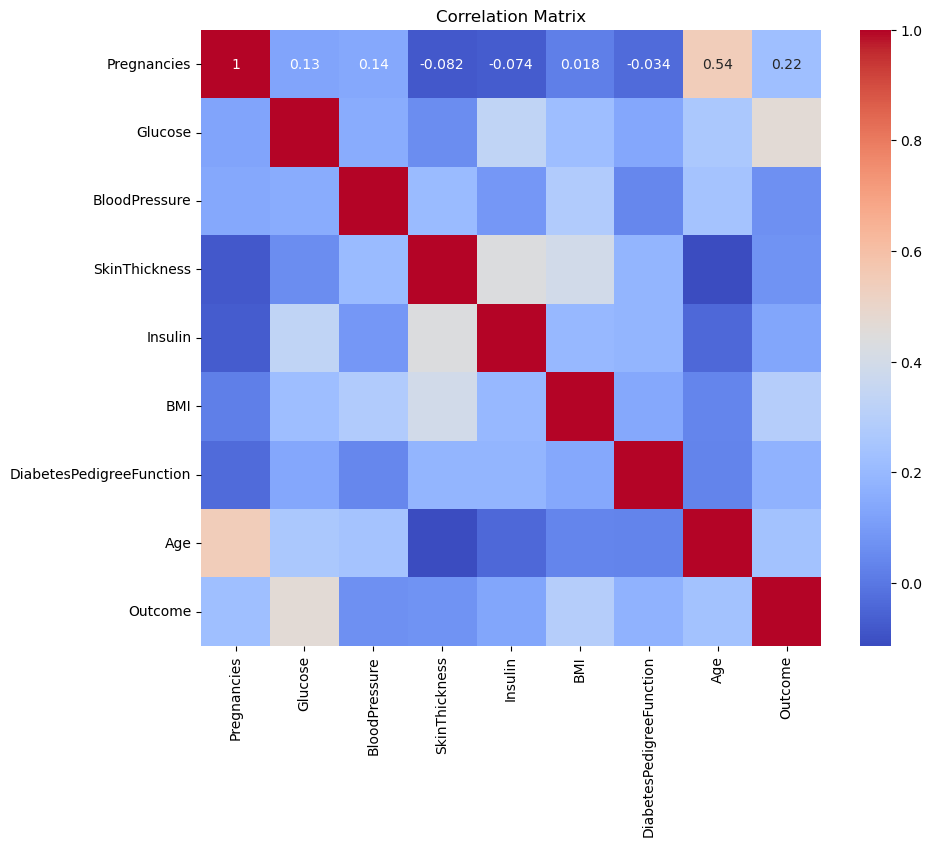

In [12]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Data preprocessing
sc = StandardScaler()

In [14]:
# Separating features and target variable
X = df.drop(columns='Outcome')
y = df['Outcome']

In [15]:
# Scaling the features
X = sc.fit_transform(X)

In [16]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [17]:
# Training the K-Nearest Neighbors (KNN) classifier
knn = KNeighborsClassifier(n_neighbors=11, p=3, metric='minkowski')
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=11, p=3)

In [18]:
# Making predictions on the test set
y_pred = knn.predict(X_test)

In [19]:
# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.78


In [20]:
# Saving the classifier model and the scaler using joblib
joblib.dump(knn, 'final_knn_model.joblib')
joblib.dump(sc, 'final_knn_scaler.joblib')

['final_knn_scaler.joblib']